# Pizza Place Sales
A year's worth of sales from a fictious pizza place including thge date and time of each order and the pizzas served with aditional details on the type, size, quantity and ingredients.


# Recommended Analysis
* How many customers do we have each day? 
* Are there any peak hours?
* How many pizzas are typically in an order? 
* Do we have any bestsellers?
* How much money did we make this year? 
* Can we identify any seasonality in the sales?
* Are there any pizzas we should take off the menu or any promotions we could leverage?

In [1]:
# Import all libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read all csv's into various dataframes
order = pd.read_csv("/Users/OWEN ADOM ASARE/GTL/jupyterfiles/CSV's/orders.csv")

order_details = pd.read_csv("/Users/OWEN ADOM ASARE/GTL/jupyterfiles/CSV's/order_details.csv")

pizzas = pd.read_csv("/Users/OWEN ADOM ASARE/GTL/jupyterfiles/CSV's/pizzas.csv")

pizza_types = pd.read_csv("/Users/OWEN ADOM ASARE/GTL/jupyterfiles/CSV's/pizza_types.csv", encoding='latin')

In [3]:
order.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [4]:
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [5]:
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [6]:
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [7]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [8]:
 order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [9]:
pizza_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [10]:
pizzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [11]:
print(order.columns)
print(order_details.columns)
print(pizzas.columns)
print(pizza_types.columns)

Index(['order_id', 'date', 'time'], dtype='object')
Index(['order_details_id', 'order_id', 'pizza_id', 'quantity'], dtype='object')
Index(['pizza_id', 'pizza_type_id', 'size', 'price'], dtype='object')
Index(['pizza_type_id', 'name', 'category', 'ingredients'], dtype='object')


# Feature Engineering

In [12]:
# Merge all tables into one table
pizza_df = order.merge(order_details, on='order_id').merge(pizzas, on='pizza_id').merge(pizza_types, on='pizza_type_id')
pizza_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


In [13]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [14]:
pizza_df.isna().sum()

order_id            0
date                0
time                0
order_details_id    0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [15]:
pizza_df['date']= pd.to_datetime(pizza_df['date'])

In [16]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          48620 non-null  int64         
 1   date              48620 non-null  datetime64[ns]
 2   time              48620 non-null  object        
 3   order_details_id  48620 non-null  int64         
 4   pizza_id          48620 non-null  object        
 5   quantity          48620 non-null  int64         
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 4.5+ MB


In [17]:
pizza_df['day']=pizza_df['date'].dt.dayofweek

In [18]:
pizza_df['month']=pizza_df['date'].dt.month

In [19]:
pizza_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day,month
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",3,1
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",4,1
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",5,1
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",5,1
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",6,1


In [20]:
pizza_df['hour']=pd.to_datetime(pizza_df.time).dt.hour

C:\Users\OWEN ADOM ASARE\AppData\Local\Temp\ipykernel_2540\836165790.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pizza_df['hour']=pd.to_datetime(pizza_df.time).dt.hour


In [21]:
pizza_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day,month,hour
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",3,1,11
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",4,1,12
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",5,1,14
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",5,1,16
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",6,1,20


In [22]:
pizza_df.iloc[0]

order_id                                                   1
date                                     2015-01-01 00:00:00
time                                                11:38:36
order_details_id                                           1
pizza_id                                          hawaiian_m
quantity                                                   1
pizza_type_id                                       hawaiian
size                                                       M
price                                                  13.25
name                                      The Hawaiian Pizza
category                                             Classic
ingredients         Sliced Ham, Pineapple, Mozzarella Cheese
day                                                        3
month                                                      1
hour                                                      11
Name: 0, dtype: object

In [23]:
days={
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'
}

In [24]:
pizza_df['day']=pizza_df.day.map(days)

In [25]:
months={
    1:'January',
    2:'February',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'August',
    9:'September',
    10:'October',
    11:'November',
    12:'December'
}

In [26]:
pizza_df['month']=pizza_df.month.map(months)

In [27]:
pizza_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day,month,hour
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,January,11
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Friday,January,12
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,January,14
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,January,16
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Sunday,January,20


In [28]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          48620 non-null  int64         
 1   date              48620 non-null  datetime64[ns]
 2   time              48620 non-null  object        
 3   order_details_id  48620 non-null  int64         
 4   pizza_id          48620 non-null  object        
 5   quantity          48620 non-null  int64         
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
 12  day               48620 non-null  object        
 13  month             48620 non-null  object        
 14  hour              4862

In [29]:
pizza_df.iloc[0]

order_id                                                   1
date                                     2015-01-01 00:00:00
time                                                11:38:36
order_details_id                                           1
pizza_id                                          hawaiian_m
quantity                                                   1
pizza_type_id                                       hawaiian
size                                                       M
price                                                  13.25
name                                      The Hawaiian Pizza
category                                             Classic
ingredients         Sliced Ham, Pineapple, Mozzarella Cheese
day                                                 Thursday
month                                                January
hour                                                      11
Name: 0, dtype: object

In [30]:
pizza_df['sales'] = pizza_df['quantity'] * pizza_df['price']

In [31]:
pizza_df.sample(5)

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day,month,hour,sales
44315,14548,2015-08-31,17:21:04,32909,sicilian_l,1,sicilian,L,20.25,The Sicilian Pizza,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",Monday,August,17,20.25
44688,6324,2015-04-16,22:29:31,14453,sicilian_m,1,sicilian,M,16.25,The Sicilian Pizza,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",Thursday,April,22,16.25
2261,18969,2015-11-20,13:36:55,43155,hawaiian_l,1,hawaiian,L,16.50,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Friday,November,13,16.50
33720,18223,2015-11-07,13:07:13,41388,big_meat_s,1,big_meat,S,12.00,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",Saturday,November,13,12.00
30871,11324,2015-07-08,18:40:06,25737,pepperoni_s,1,pepperoni,S,9.75,The Pepperoni Pizza,Classic,"Mozzarella Cheese, Pepperoni",Wednesday,July,18,9.75


In [32]:
pizza_df.head(2)

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day,month,hour,sales
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,January,11,13.25
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Friday,January,12,13.25


## How many pizzas were sold in the year

In [33]:
pizza_df.quantity.sum()

49574

# NB
49574 quantities of pizza were sold in the year 2015

## How many days did the restaurant operated

In [34]:
pizza_df.date.count()-pizza_df.date.duplicated().sum()

358

In [35]:
pizza_df.date.duplicated().sum()

48262

In [36]:
pizza_df[-pizza_df.date.duplicated()].count()[1]

358

## NB
The restaurant operated for 358 days

## How many orders were placed under the year of review

In [37]:
pizza_df['order_id'].drop_duplicates().count()

21350

## How much money was made in the year?

In [38]:
# Amount made in a year
pizza_df['sales'].sum()

817860.05

## NB
817860.05 was the amount made in the year

In [39]:
# Amount made per month
pizza_df['sales'].sum()/12

68155.00416666667

In [40]:
# Amount made per days worked 
pizza_df['sales'].sum()/358

2284.525279329609

## Which days are we busy?

In [41]:
day_df = pizza_df.groupby('day')['quantity'].sum().sort_values(ascending=False).reset_index()


day_df['qty_pect'] = round(day_df['quantity']/day_df['quantity'].sum()*100,2)
day_df.head()

,day,quantity,qty_pect
0,Friday,8242,16.63
1,Saturday,7493,15.11
2,Thursday,7478,15.08
3,Wednesday,6946,14.01
4,Tuesday,6895,13.91


The day on which the pizza joint was busy was on Fridays

In [42]:
day_df['quantity']/day_df['quantity'].sum()*100

0    16.625651
1    15.114778
2    15.084520
3    14.011377
4    13.908500
5    13.081454
6    12.173720
Name: quantity, dtype: float64

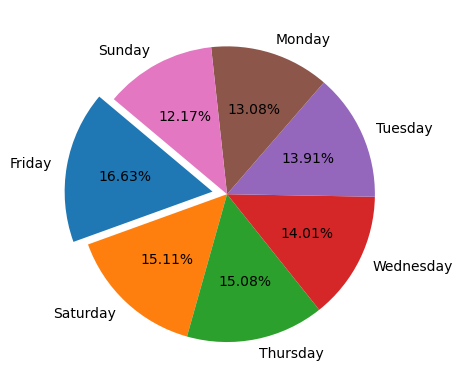

In [43]:
plt.pie(day_df['qty_pect'], labels=day_df['day'], autopct='%1.2F%%', startangle=140,
       explode=[0.1,0,0,0,0,0,0,]);

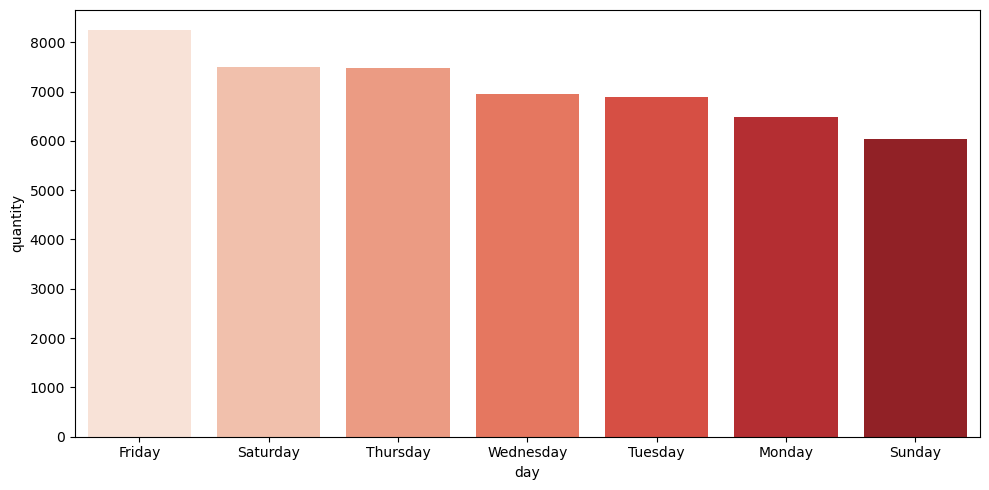

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(day_df, 
            x='day', 
            y='quantity', 
           palette='Reds')
plt.tight_layout();

## Days they had more sales

In [45]:
sale_df = pd.DataFrame(pizza_df.groupby('day')['sales'].sum().sort_values(ascending=False)).reset_index()


sale_df['sale_pect'] = round(sale_df['sales']/sale_df['sales'].sum()*100,2)
sale_df

,day,sales,sale_pect
0,Friday,136073.90,16.64
1,Thursday,123528.50,15.10
2,Saturday,123182.40,15.06
3,Wednesday,114408.40,13.99
4,Tuesday,114133.80,13.96
5,Monday,107329.55,13.12
6,Sunday,99203.50,12.13


In [46]:
colors = ['silver','paleturquoise', 'cyan', 'lime','slategray','orange','lawngreen']

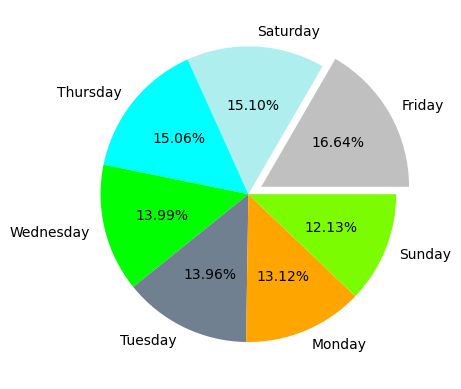

In [47]:
plt.pie(sale_df['sale_pect'],
        labels=day_df['day'],
        autopct='%1.2F%%',
        explode=[0.1,0,0,0,0,0,0,],
        colors=colors);

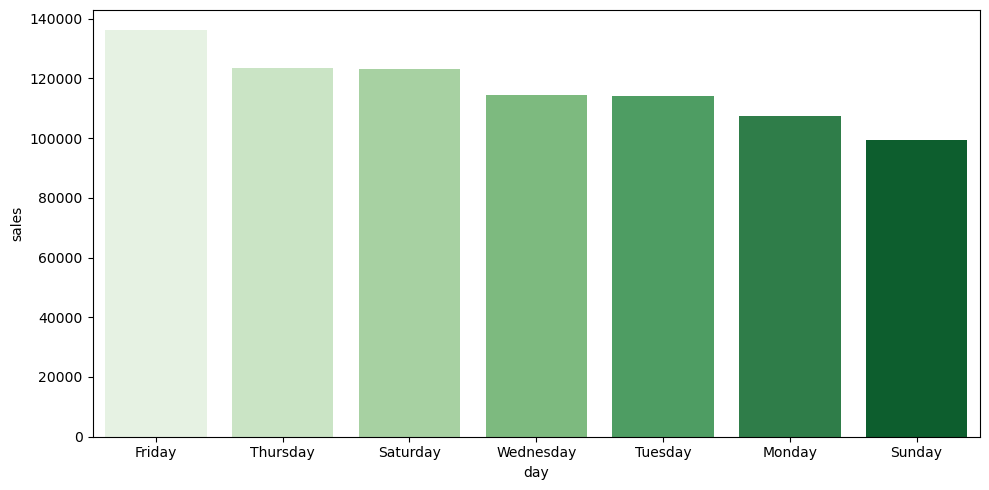

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(sale_df,
            x='day',
            y='sales', 
            palette ='Greens')
plt.tight_layout();

## How many different pizzas did they sell?

In [49]:
pizza_df['pizza_type_id'].nunique()

32

## Top  3 Selling Pizzas

In [50]:
Top_Selling = pizza_df.groupby('name')['quantity'].sum().sort_values(ascending=False).reset_index()

Top_Selling['top_pct']= round(Top_Selling['quantity']/Top_Selling['quantity'].sum()*100,2)
Top_Selling.head(3)

,name,quantity,top_pct
0,The Classic Deluxe Pizza,2453,4.95
1,The Barbecue Chicken Pizza,2432,4.91
2,The Hawaiian Pizza,2422,4.89


## Worst 3 Selling pizza

In [51]:
Top_Selling.tail(3)

,name,quantity,top_pct
29,The Calabrese Pizza,937,1.89
30,The Mediterranean Pizza,934,1.88
31,The Brie Carre Pizza,490,0.99


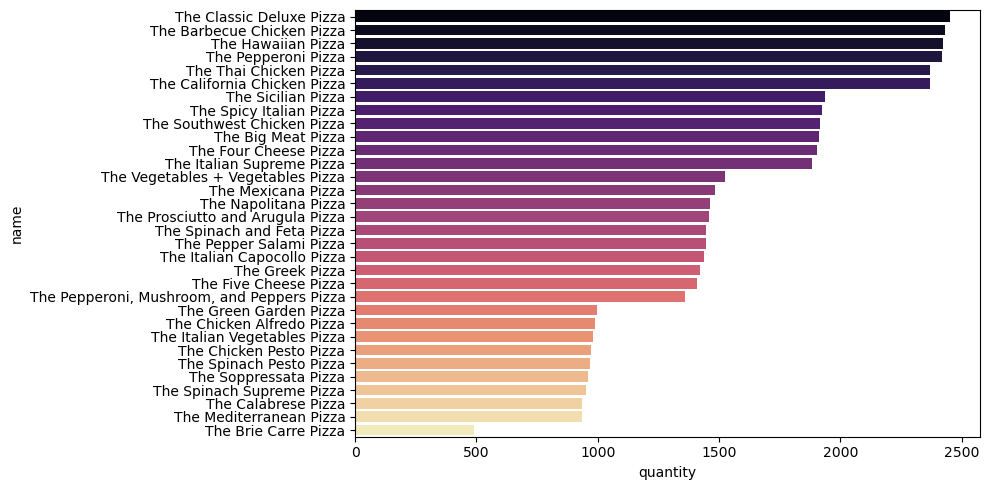

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(Top_Selling,
            y='name',
            x='quantity',
           orient='h',
           palette='magma')
plt.tight_layout();

## Top Profitable Pizza Type

In [53]:
Profitable_Pizza = pizza_df.groupby('name')['sales'].sum().sort_values(ascending=False).reset_index()

Profitable_Pizza['top_pct']= round(Profitable_Pizza['sales']/Profitable_Pizza['sales'].sum()*100,2)

Profitable_Pizza.head()

,name,sales,top_pct
0,The Thai Chicken Pizza,43434.25,5.31
1,The Barbecue Chicken Pizza,42768.00,5.23
2,The California Chicken Pizza,41409.50,5.06
3,The Classic Deluxe Pizza,38180.50,4.67
4,The Spicy Italian Pizza,34831.25,4.26


In [54]:
print('Top Seller')
print('==' * 24)
print(Top_Selling.head())
print('==' * 24)
print('                ')
print('Profitable')
print('==' * 24)
print(Profitable_Pizza.head())

Top Seller
                         name  quantity  top_pct
0    The Classic Deluxe Pizza      2453     4.95
1  The Barbecue Chicken Pizza      2432     4.91
2          The Hawaiian Pizza      2422     4.89
3         The Pepperoni Pizza      2418     4.88
4      The Thai Chicken Pizza      2371     4.78
                
Profitable
                           name     sales  top_pct
0        The Thai Chicken Pizza  43434.25     5.31
1    The Barbecue Chicken Pizza  42768.00     5.23
2  The California Chicken Pizza  41409.50     5.06
3      The Classic Deluxe Pizza  38180.50     4.67
4       The Spicy Italian Pizza  34831.25     4.26


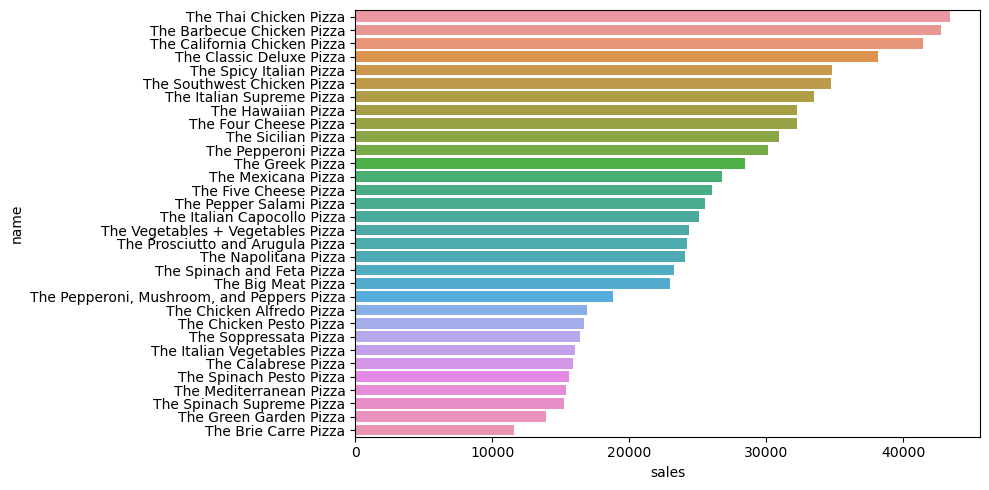

In [55]:
plt.figure(figsize=(10,5))
sns.barplot(Profitable_Pizza,
            y='name',
            x='sales',
           orient='h')
plt.tight_layout();

In [164]:
pizza_df.groupby('name')[['sales', 'quantity']].sum().sort_values(by='sales', ascending=False).reset_index()

,name,sales,quantity
0,The Thai Chicken Pizza,43434.25,2371
1,The Barbecue Chicken Pizza,42768.00,2432
2,The California Chicken Pizza,41409.50,2370
3,The Classic Deluxe Pizza,38180.50,2453
4,The Spicy Italian Pizza,34831.25,1924
5,The Southwest Chicken Pizza,34705.75,1917
6,The Italian Supreme Pizza,33476.75,1884
7,The Hawaiian Pizza,32273.25,2422
8,The Four Cheese Pizza,32265.70,1902
9,The Sicilian Pizza,30940.50,1938


## Sizes People bought more

In [57]:
Size_df = pizza_df.groupby('size')[['quantity', 'sales']].sum().reset_index()
Size_df['size_pct_sales']= round(Size_df['sales']/Size_df['sales'].sum()*100,2)
Size_df['size_pct_qty']= round(Size_df['quantity']/Size_df['quantity'].sum()*100,2)
Size_df

,size,quantity,sales,size_pct_sales,size_pct_qty
0,L,18956,375318.70,45.89,38.24
1,M,15635,249382.25,30.49,31.54
2,S,14403,178076.50,21.77,29.05
3,XL,552,14076.00,1.72,1.11
4,XXL,28,1006.60,0.12,0.06


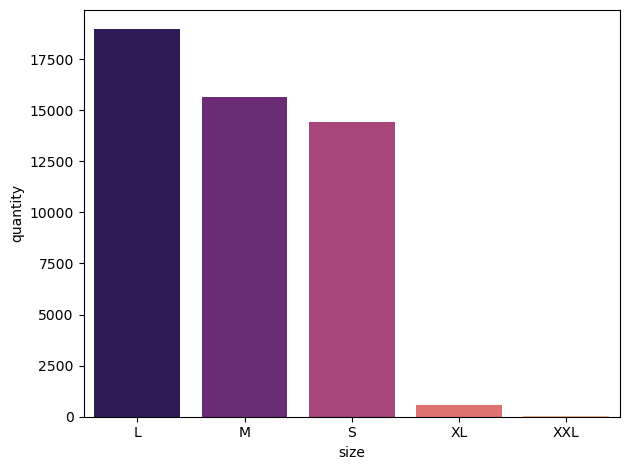

In [58]:
sns.barplot(Size_df,
            x='size',
            y='quantity', 
           palette='magma')
plt.tight_layout();

In [59]:
# Peak Hours
pizza_df.groupby('hour')['quantity'].sum().sort_values(ascending=False)

hour
12    6776
13    6413
18    5417
17    5211
19    4406
16    4239
14    3613
20    3534
15    3216
11    2728
21    2545
22    1386
23      68
10      18
9        4
Name: quantity, dtype: int64

In [60]:
# heat map of peak hours with days
Peak = pizza_df.groupby(['day', 'hour'])['quantity'].sum().unstack('hour')
Peak

hour,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,
Friday,NaN,NaN,388.0,1101.0,1040.0,525.0,441.0,578.0,759.0,936.0,748.0,706.0,613.0,381.0,26.0
Monday,NaN,3.0,472.0,1126.0,803.0,460.0,411.0,541.0,712.0,666.0,537.0,360.0,278.0,112.0,4.0
Saturday,NaN,3.0,208.0,633.0,794.0,530.0,525.0,646.0,729.0,881.0,841.0,738.0,591.0,343.0,31.0
Sunday,NaN,2.0,232.0,604.0,689.0,520.0,486.0,623.0,714.0,732.0,577.0,405.0,304.0,143.0,4.0
Thursday,NaN,5.0,468.0,1149.0,1131.0,574.0,468.0,650.0,856.0,807.0,587.0,451.0,216.0,113.0,3.0
Tuesday,4.0,NaN,426.0,1105.0,1018.0,488.0,420.0,630.0,669.0,639.0,600.0,476.0,272.0,148.0,NaN
Wednesday,NaN,5.0,534.0,1058.0,938.0,516.0,465.0,571.0,772.0,756.0,516.0,398.0,271.0,146.0,NaN


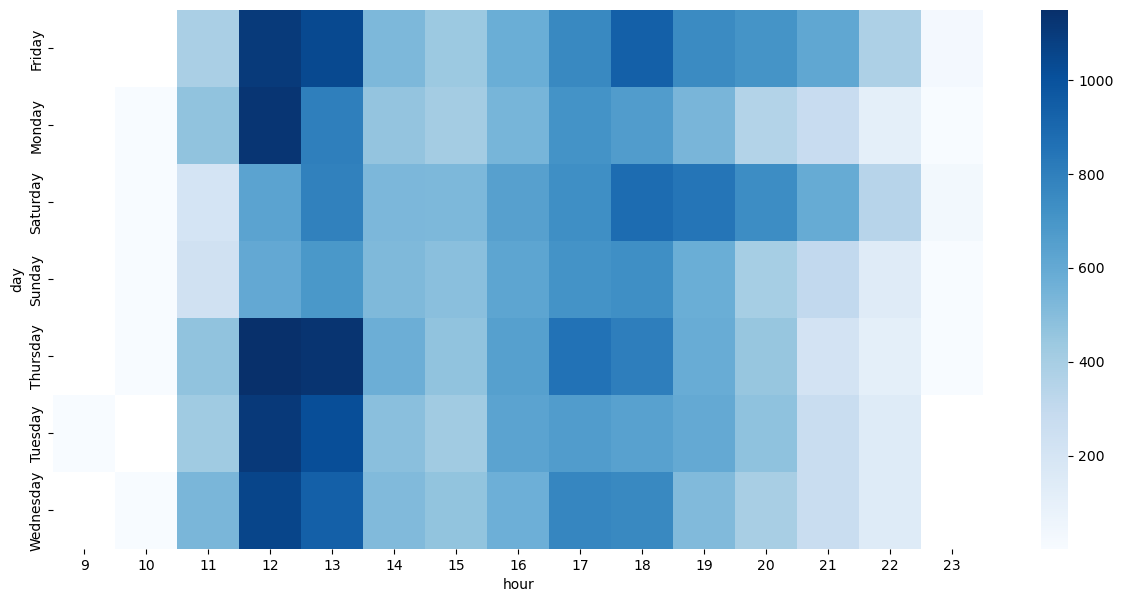

In [61]:
plt.figure(figsize=(15,7))
sns.heatmap(Peak, cmap='Blues');

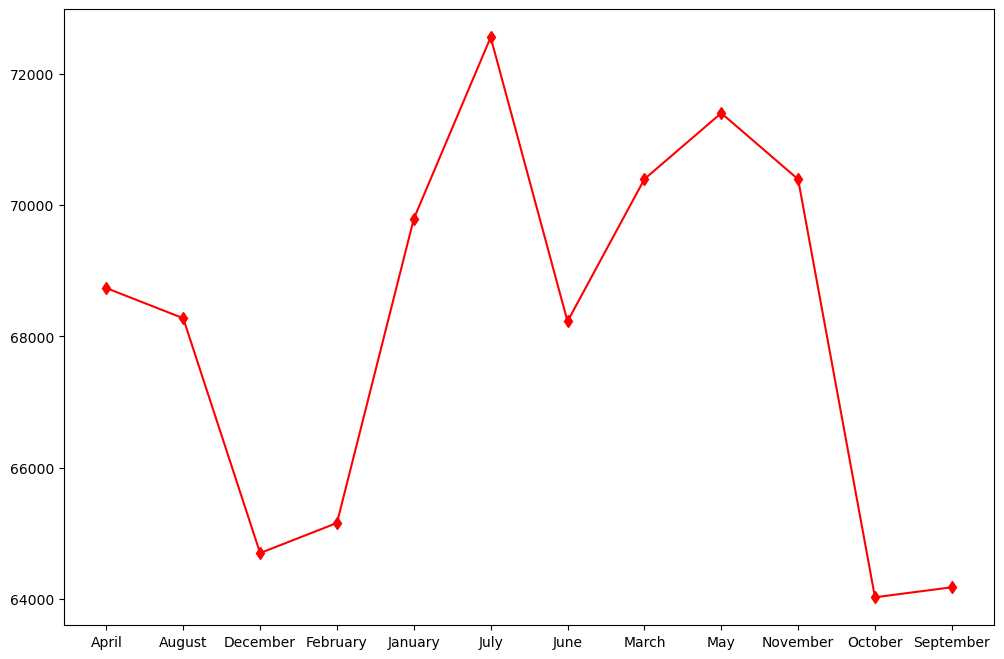

In [72]:
# Can we identify any seasonality in the sales?
plt.figure(figsize=(12,8))
plt.plot(season, color='red', marker='d');

In [71]:
season = pizza_df.groupby('month')['sales'].sum()

# DASHBOARD

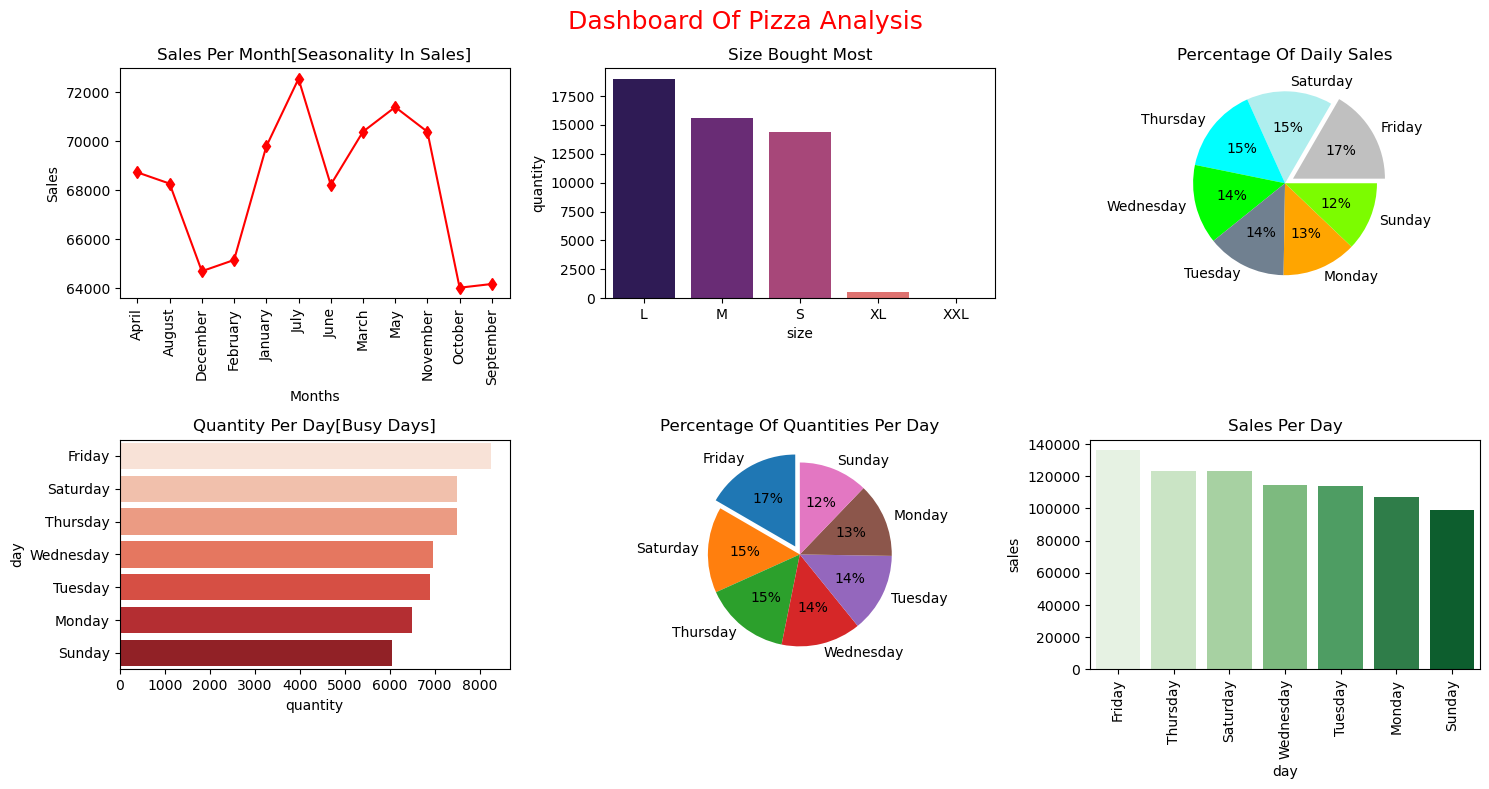

In [166]:
plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
plt.plot(season, color='red', marker='d')
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Sales Per Month[Seasonality In Sales]')

plt.subplot(2,3,2)
sns.barplot(Size_df,
            x='size',
            y='quantity', 
           palette='magma')
plt.title('Size Bought Most')

plt.subplot(2,3,3)
plt.pie(sale_df['sale_pect'],
        labels=day_df['day'],
        autopct='%1.0F%%',
        explode=[0.1,0,0,0,0,0,0,],
        colors=colors)
plt.title('Percentage Of Daily Sales')

plt.subplot(2,3,4)
sns.barplot(day_df, 
            y='day', 
            x='quantity', 
           palette='Reds',
           orient='h')
plt.title('Quantity Per Day[Busy Days]')

plt.subplot(2,3,5)
plt.pie(day_df['qty_pect'], 
        labels=day_df['day'], 
        autopct='%1.0F%%', 
        startangle=90,
        explode=[0.1,0,0,0,0,0,0,])
plt.title('Percentage Of Quantities Per Day')

plt.subplot(2,3,6)
sns.barplot(sale_df,
            x='day',
            y='sales', 
            palette ='Greens')
plt.title('Sales Per Day')
plt.xticks(rotation=90)




plt.suptitle('Dashboard Of Pizza Analysis', color = 'Red', fontsize=18)
plt.tight_layout();

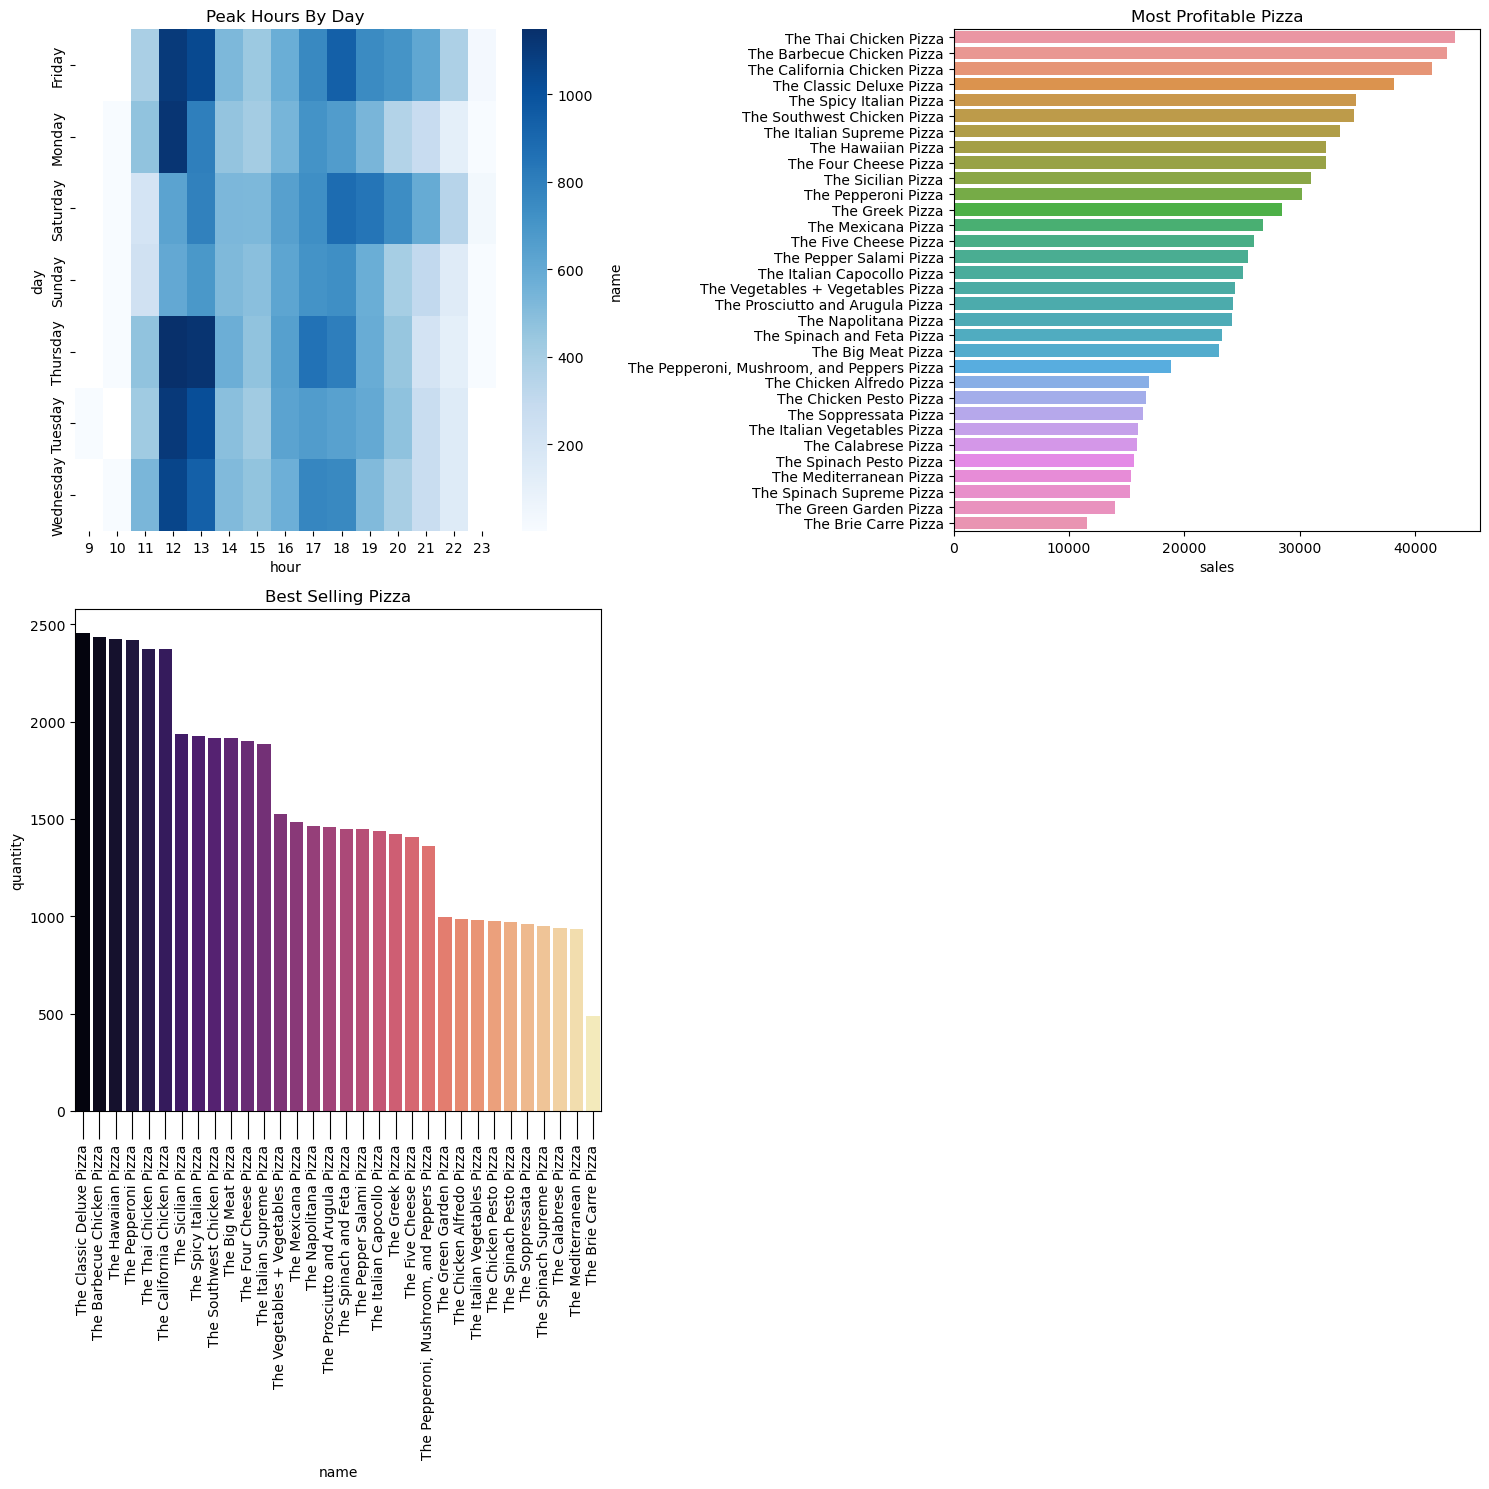

In [165]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.heatmap(Peak, cmap='Blues')
plt.title('Peak Hours By Day')

plt.subplot(2,2,2)
sns.barplot(Profitable_Pizza,
            y='name',
            x='sales',
            orient='h')
plt.title('Most Profitable Pizza')

plt.subplot(2,2,3)
sns.barplot(Top_Selling,
            x='name',
            y='quantity',
           palette='magma')
plt.title('Best Selling Pizza')
plt.xticks(rotation=90)
plt.tick_params(axis='x', size=20)



plt.tight_layout()
plt.suptitle('Analysis B of The ')

# Recommended Analysis
* How many customers do we have each day? 
* Are there any peak hours?
* How many pizzas are typically in an order? 
* Do we have any bestsellers?
* How much money did we make this year? 
* Can we identify any seasonality in the sales?
* Are there any pizzas we should take off the menu or any promotions we could leverage?

In [206]:
Customers_per_day =pizza_df.groupby('day')['order_id'].nunique().reset_index().sort_values(by='order_id',ascending=False)
Customers_per_day

,day,order_id
0,Friday,3538
4,Thursday,3239
2,Saturday,3158
6,Wednesday,3024
5,Tuesday,2973
1,Monday,2794
3,Sunday,2624


In [207]:
Customers_per_day.rename(columns={'order_id': 'customers'}, inplace=True)

In [208]:
Customers_per_day

,day,customers
0,Friday,3538
4,Thursday,3239
2,Saturday,3158
6,Wednesday,3024
5,Tuesday,2973
1,Monday,2794
3,Sunday,2624


<BarContainer object of 7 artists>

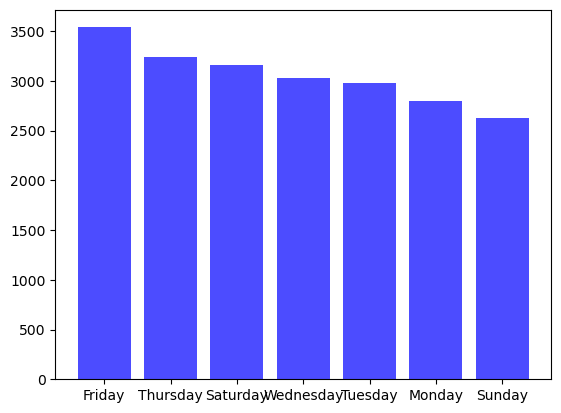

In [213]:
plt.bar(Customers_per_day['day'], Customers_per_day['customers'],
       color='blue', alpha=0.7)